In [1]:
import os
os.chdir('/home')

from warnings import filterwarnings
filterwarnings('ignore', module='skimage')

import numpy as np
import gym
import rl

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

from kerasgym.models import cnn_model_base, DDPGModel
from kerasgym.agents import Agent
from kerasgym.agents.process_state import downsample, rgb_to_binary
from kerasgym.agents.process_state import stack_consecutive, combine_consecutive
from kerasgym.agents.process_action import argmax
from kerasgym.agents.exploration import ScopingPeriodic, EpsilonGreedy
from kerasgym.agents.exploration import graph_schedule

Using TensorFlow backend.


In [5]:
# env
env = gym.make('Breakout-v0')
env.reset()

# custom shape due to downsampling and stacking
shape = (84, 84, 4)

# model
base_config = {
    'in_shape': shape,
    'conv_layer_sizes': [32, 32, 32],
    'fc_layer_sizes': [32, 16, 8],
    'kernel_sizes': [(3,3)]*3,
    'strides': [(1,1)]*3,
    'activation': 'relu'
}

ddpg_config = {
    'action_dim': 4,
    'actor_activation': 'softmax',
    'gamma': 0.3,
    'tau': 0.01,
    'actor_alpha': 0.1,
    'critic_alpha': 0.1
}

base_model = cnn_model_base(**base_config)
model = DDPGModel(base_model, **ddpg_config)

In [6]:
schedule = ScopingPeriodic(amp=0.4, period=0.15, duration=10000)
explorer = EpsilonGreedy(schedule)
buffer_size = 10000
batch_size = 32
repeated_actions = 3

agent = Agent(env, [downsample(shape), rgb_to_binary(), stack_consecutive(4)],
              model, argmax(), explorer,
              buffer_size, batch_size, repeated_actions,
              plt=plt, ipy_display=display)
agent.reset()

In [7]:
agent.run_episode()

In [8]:
agent.replay_buffer.current_size

86


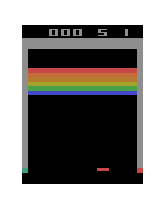
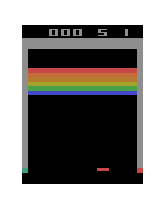
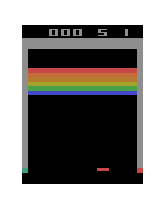
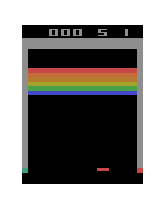
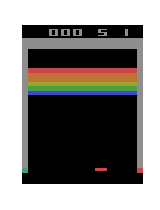
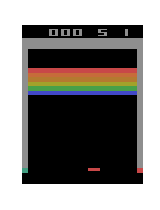
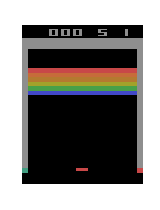
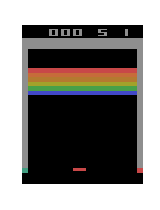
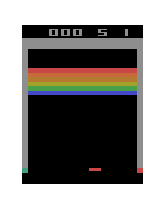
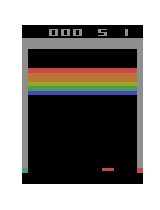
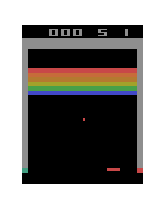
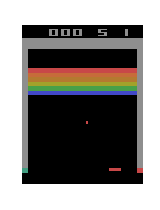
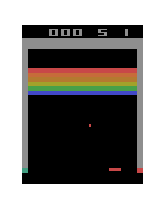
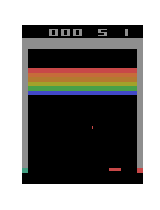
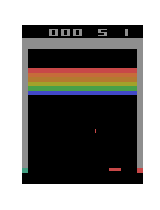
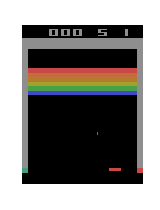
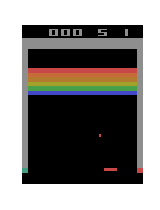
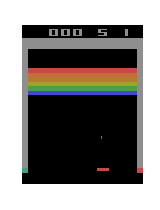
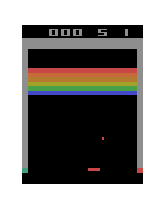
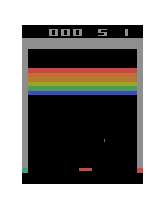
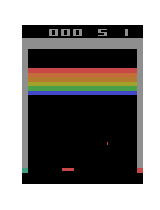
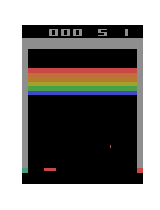
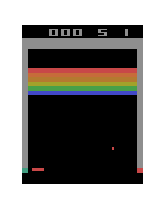
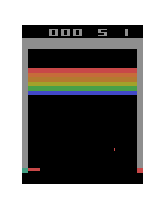
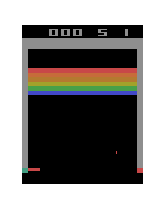
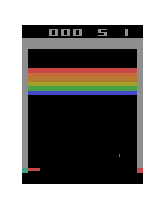
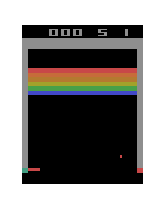
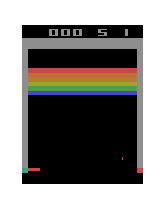
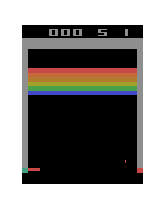
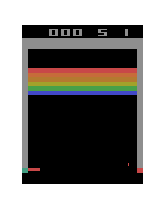
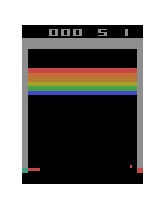
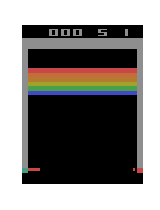
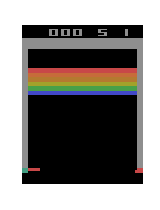
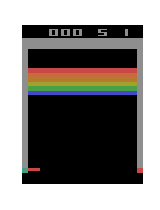
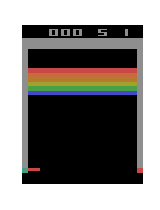
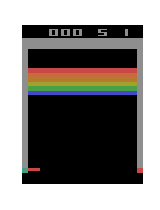
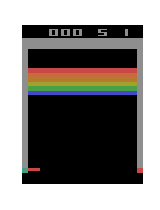
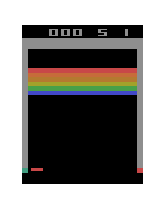
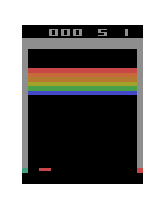
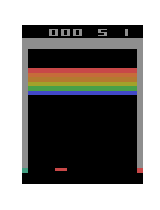
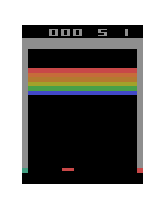
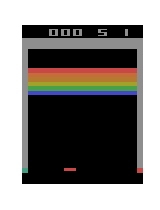
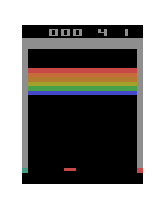
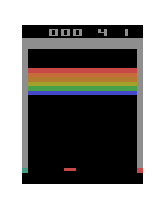
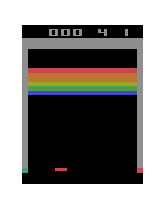
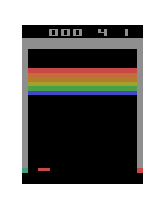
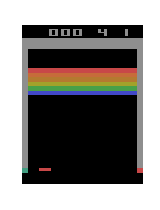
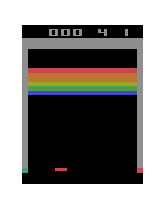
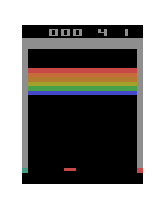
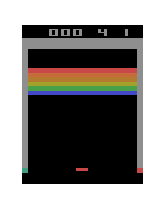
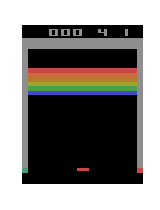
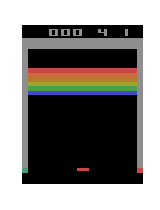
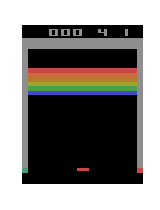
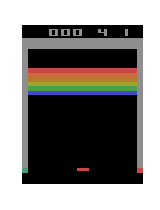
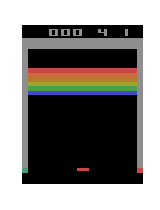
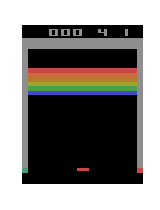
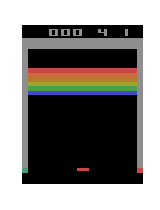
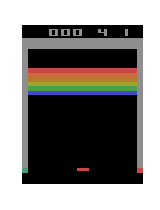
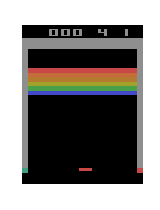
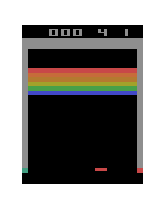
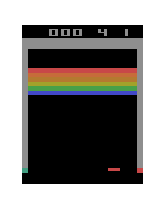
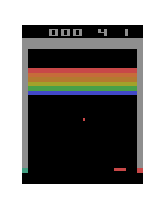
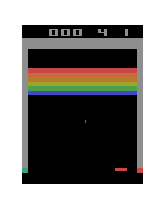
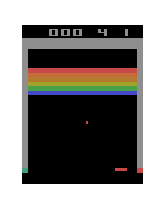
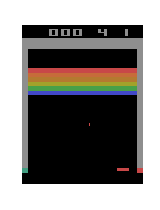
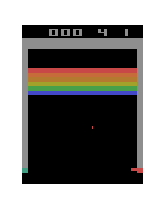
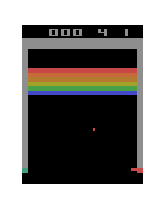
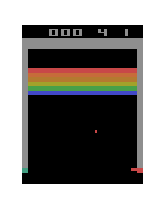
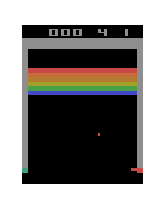
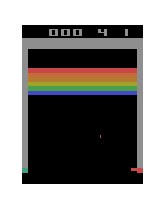
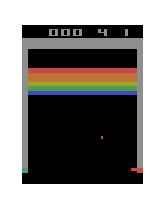
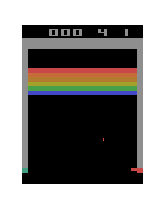
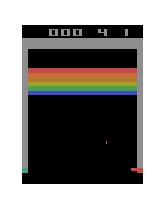
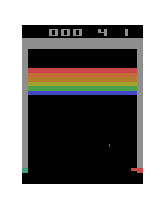
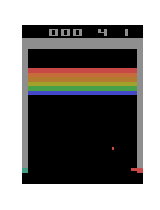
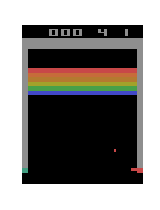
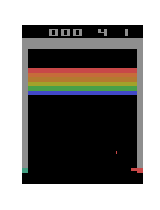
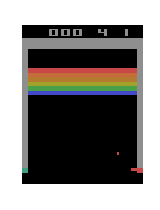
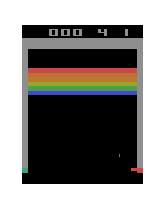
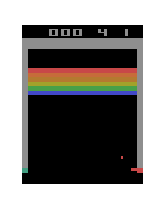
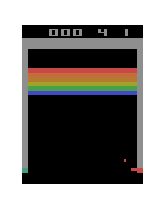
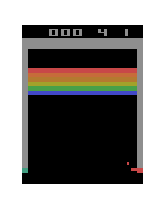
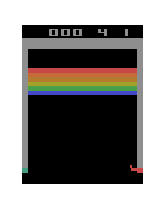
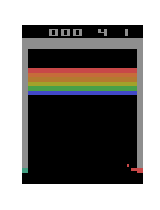
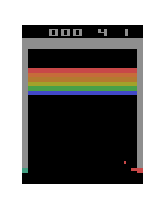
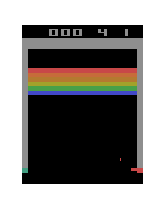
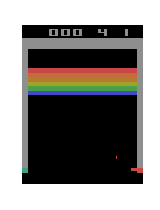
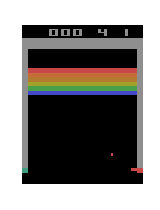
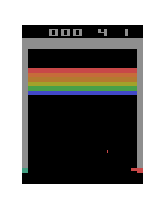
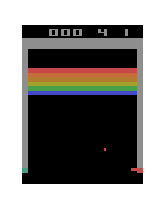
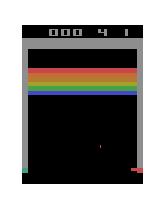
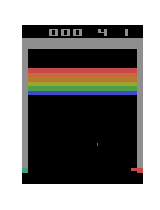
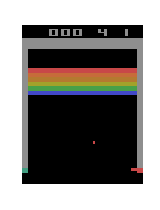
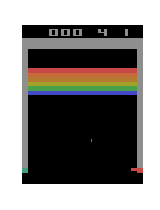
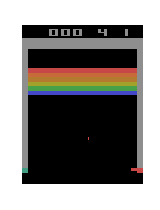
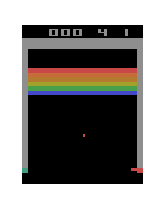
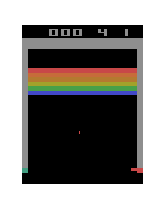
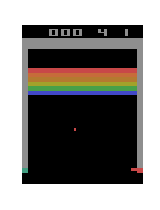
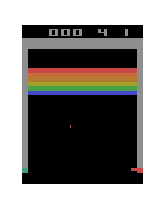
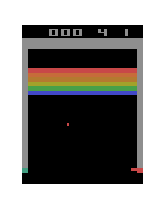
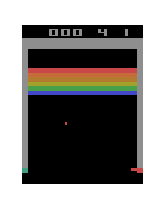
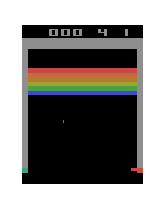
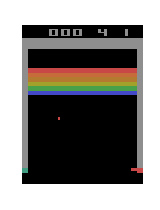
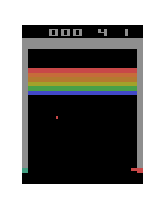
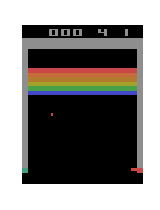
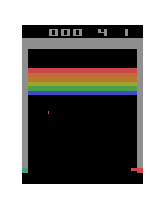
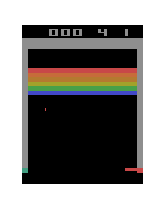
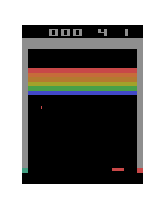
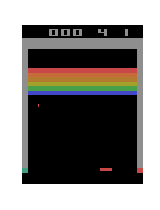
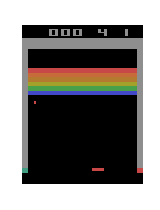
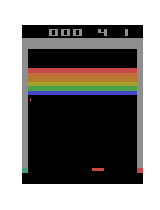
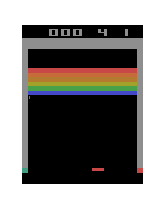
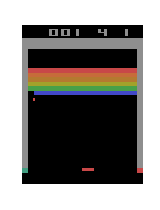
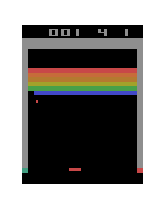
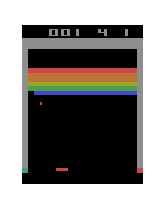
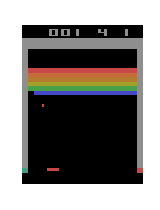
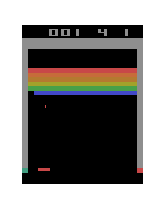
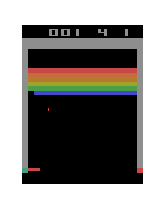
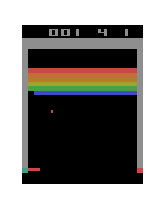
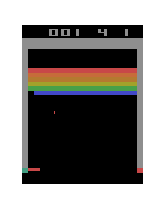
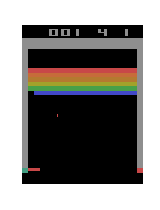
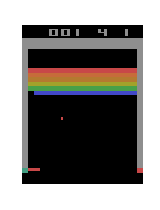
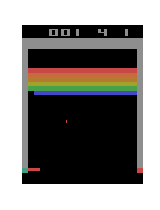
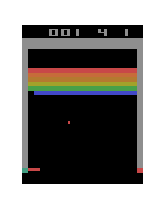
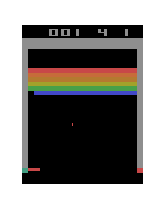
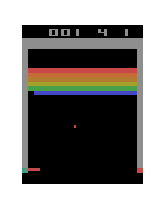
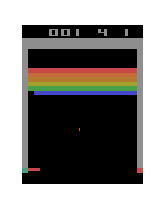
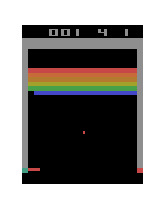
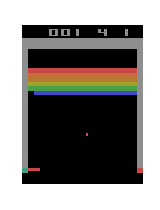
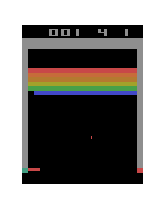
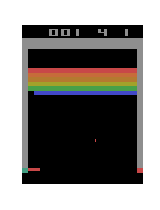
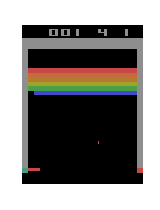
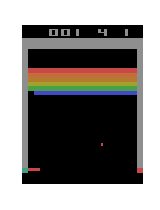
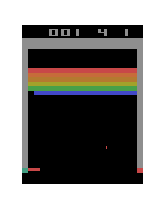
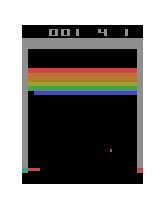
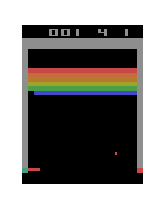
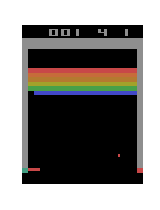
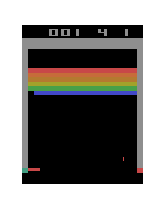
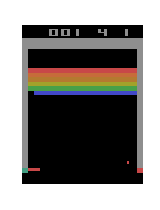
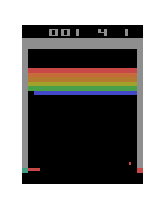
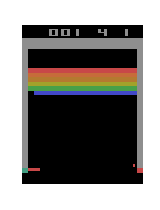
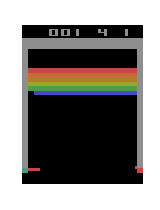
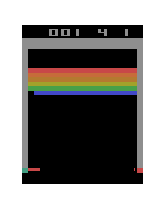
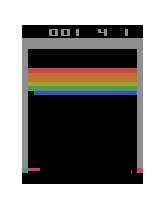
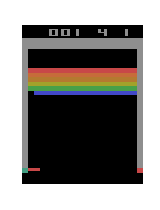
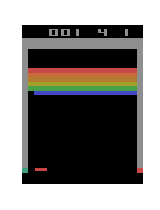
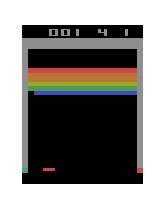
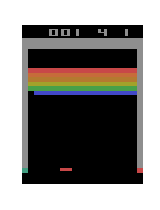
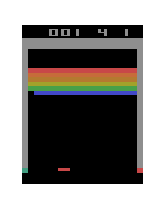
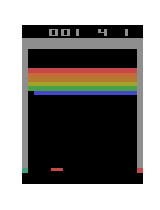
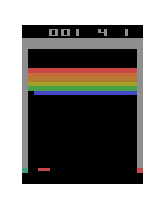
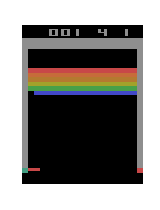
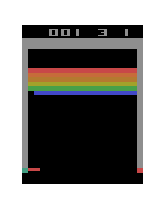
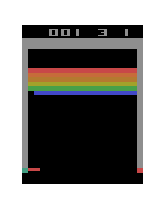
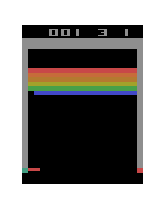
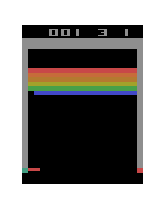
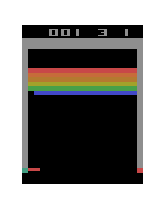
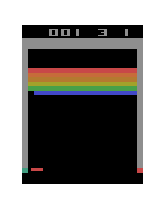
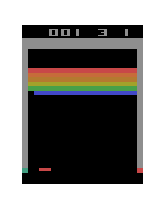
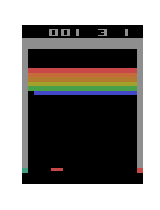
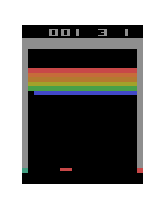
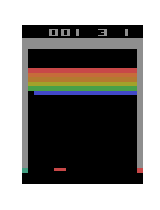
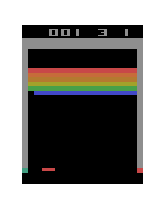
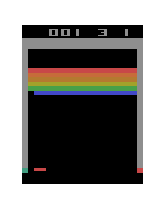
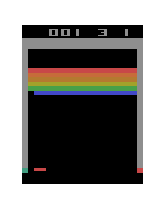
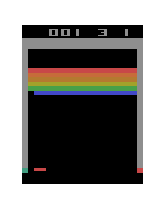
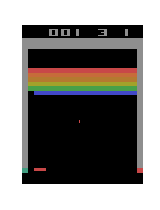
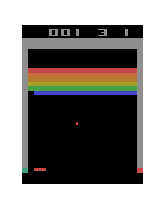
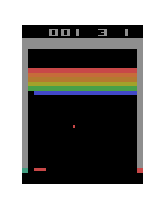
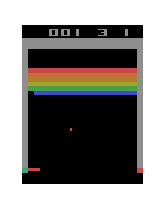
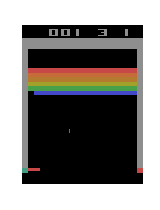
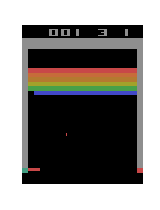
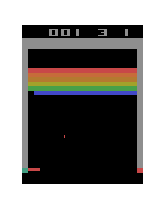
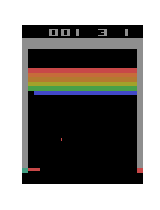
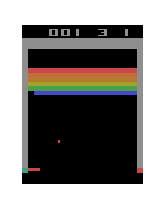
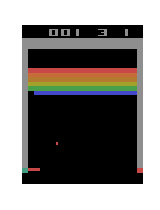
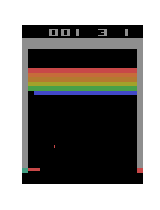
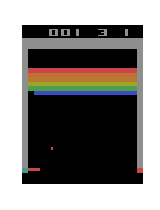
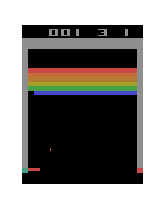
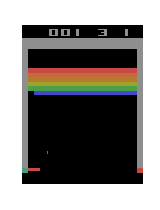
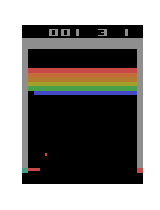
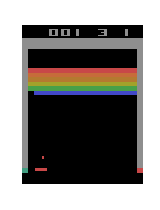
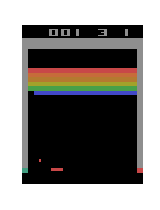
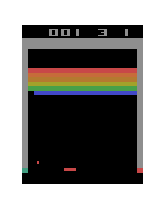
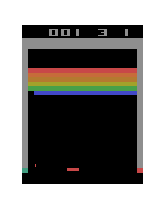
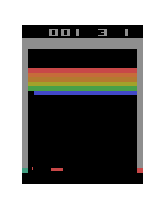
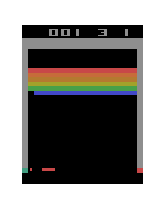
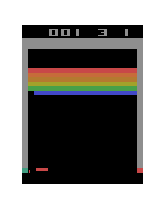
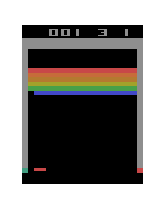
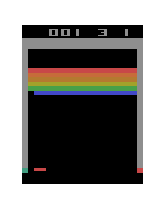
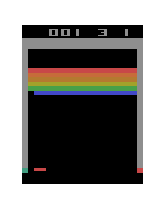
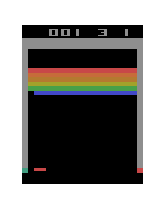
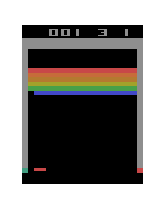
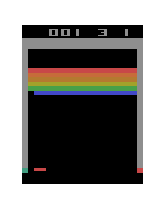
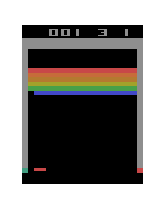
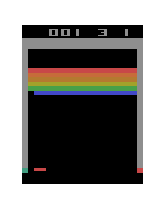
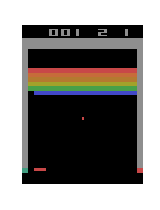
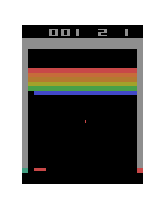
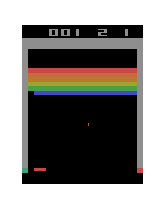
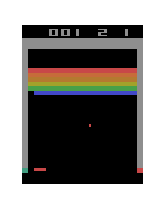
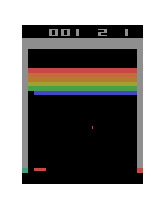
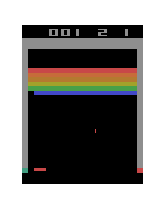
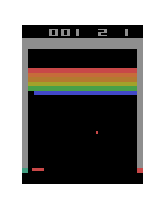
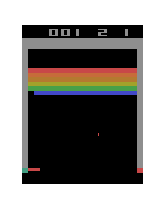
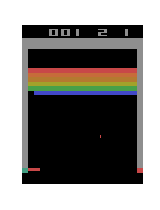
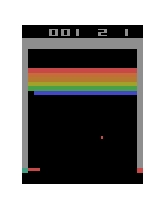
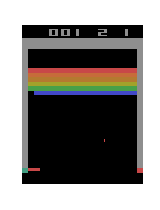
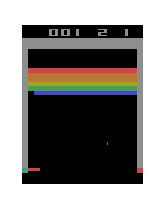
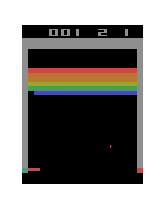
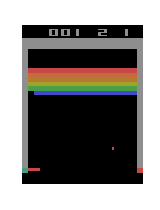
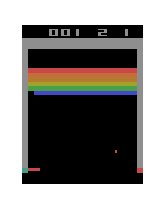
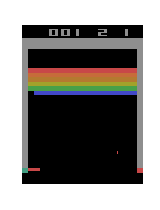
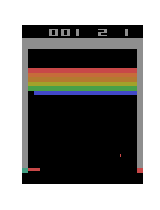
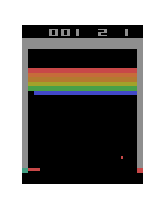
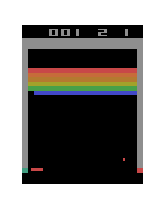
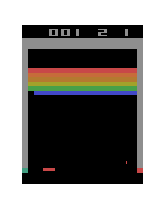
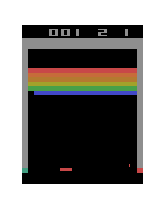
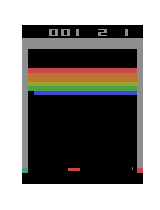
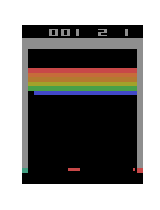
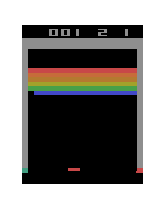
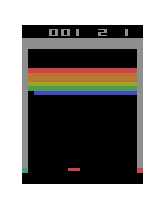
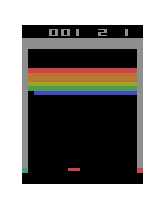
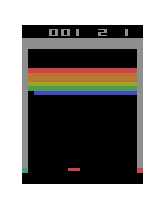
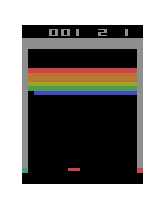
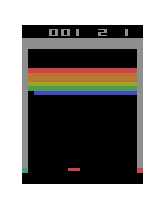
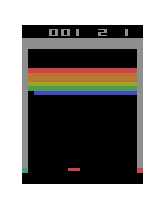
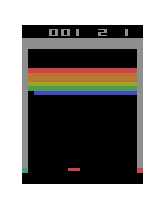
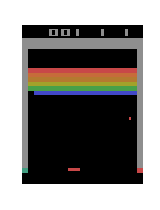
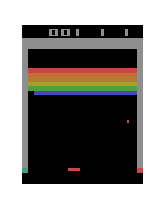
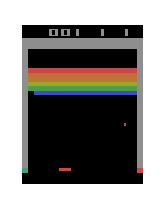
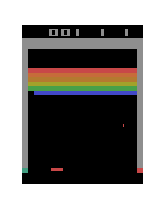
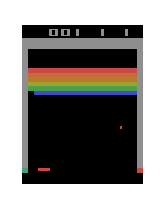
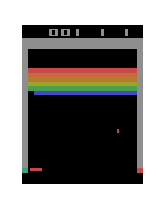
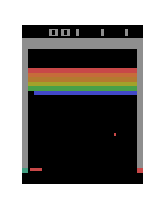
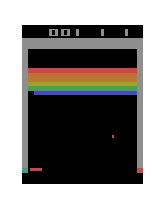
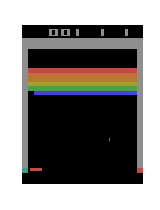
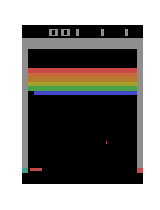
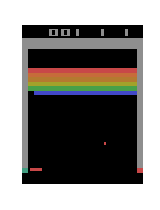
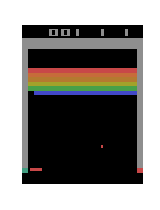
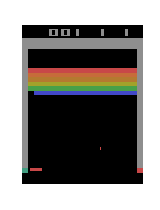
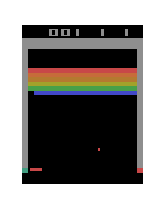
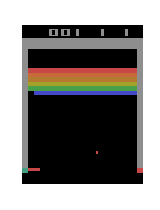
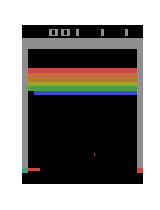
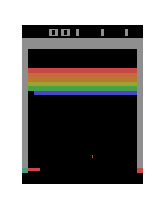
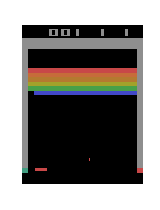
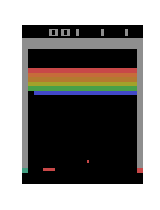
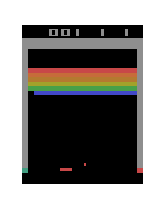
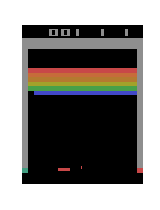
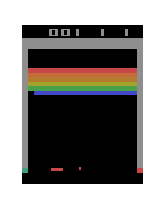
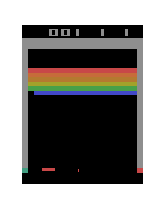
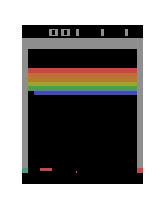
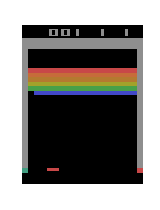
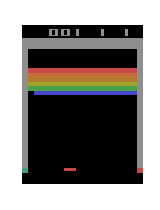
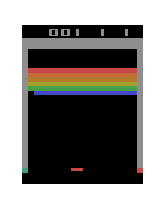
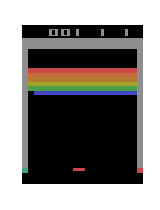
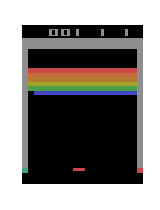
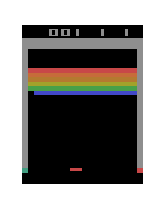
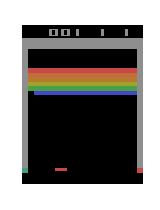

In [9]:
agent.render_gif(0)